<a href="https://colab.research.google.com/github/FREDY129053/SkillBox_ML/blob/main/11_6_ML_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Случайный лес

В этом практическом задании вы решите задачу регрессии на реальных данных при помощи линейной модели и случайного леса.

## Цели практической работы

* Научиться применять случайный лес в задаче регрессии.
* Научиться сравнивать качество случайного леса с качеством линейной модели.
* Научиться настраивать гиперпараметры леса.

## Что входит в работу

* Выполнить предобработку данных.
* Обучить линейную регрессию на данных задачи.
* Обучить случайный лес на данных задачи.
* Подобрать гиперпараметры для леса.
* Визуализировать важность признаков у леса.

## Что оценивается

*  Все ячейки заполнены; при запуске ячеек  Python не выдаёт информацию об ошибках.
*  Качество итоговой модели $R^2$ превышает 0,95.


## Что нужно сделать

Постройте модели, предсказывающие стоимость автомобилей по характеристикам.

Признаков у машин много, но в этой работе обойдёмся только числовыми признаками:
*  year — год производства автомобиля;
*  km_driven — пробег;
*  seats — количество посадочных мест;
*  mileage — другая характеристика пробега;
*  engine — мощность двигателя;
*  max_power — мощность автомобиля.

Целевая переменная — selling_price.

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

train = pd.read_csv("/content/cars_train.csv")
test = pd.read_csv("/content/cars_test.csv")

В тренировочных данных есть автомобили, для которых неизвестна стоимость. Удалите эти автомобили из трейна.

In [2]:
# Ваш код здесь
train_2 = train.copy()
train_2.dropna(subset=['selling_price'], inplace=True)

Создайте объекты Xtrain, ytrain, Xtest, ytest. Запишите в них матрицы «объект — признак» и векторы целевой переменной для тренировочного и тестового датасетов.

In [3]:
# Ваш код здесь
Xtrain, ytrain = train_2, train_2['selling_price']
Xtest, ytest = test, test['selling_price']

Перед обучением моделей обработайте данные.

Обратите внимание, что столбцы mileage, engine и max_power по смыслу числовые. Чтобы превратить их в числовые столбцы, отбросьте единицы измерения и оставьте только числа. В столбцах есть пропущенные значения, их при обработке трогать не нужно.

In [4]:
# Ваш код здесь
Xtrain['mileage'] =  Xtrain['mileage'].str.extract('(\d+)').astype(float)
Xtrain['engine'] =  Xtrain['engine'].str.extract('(\d+)').astype(float)
Xtrain['max_power'] =  Xtrain['max_power'].str.extract('(\d+)').astype(float)

Xtest['mileage'] =  Xtest['mileage'].str.extract('(\d+)').astype(float)
Xtest['engine'] =  Xtest['engine'].str.extract('(\d+)').astype(float)
Xtest['max_power'] =  Xtest['max_power'].str.extract('(\d+)').astype(float)

Оставьте в данных только шесть числовых столбцов:

year, km_driven, seats, engine, mileage, max_power

In [5]:
# Ваш код здесь
Xtrain = Xtrain[['year', 'km_driven', 'seats', 'engine', 'mileage', 'max_power']]
Xtest = Xtest[['year', 'km_driven', 'seats', 'engine', 'mileage', 'max_power']]
Xtrain.head()

,year,km_driven,seats,engine,mileage,max_power
0,2014.0,145500.0,5.0,1248.0,23.0,74.0
1,2014.0,120000.0,5.0,1498.0,21.0,103.0
2,2010.0,127000.0,5.0,1396.0,23.0,90.0
4,2017.0,45000.0,5.0,1197.0,20.0,81.0
6,2001.0,5000.0,4.0,796.0,16.0,37.0


Теперь заполните пропуски следующим образом:

*    вычислите средние значения по столбцам тренировочной выборки;

*    добавьте в пропуски в тренировочных и тестовых данных вычисленные средние.

In [6]:
# Ваш код здесь
for col in Xtrain.columns.tolist():
  Xtrain[col].fillna(Xtrain[col].mean(), inplace = True)
  Xtest[col].fillna(Xtest[col].mean(), inplace = True)
print(pd.isna(Xtrain).sum())
print(pd.isna(Xtest).sum())

year         0
km_driven    0
seats        0
engine       0
mileage      0
max_power    0
dtype: int64
year         0
km_driven    0
seats        0
engine       0
mileage      0
max_power    0
dtype: int64


<ipython-input-6-7978fa3f015f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain[col].fillna(Xtrain[col].mean(), inplace = True)
<ipython-input-6-7978fa3f015f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtest[col].fillna(Xtest[col].mean(), inplace = True)


Теперь на обработанных тренировочных данных обучите:

*  линейную регрессию,
*  случайный лес с параметрами по умолчанию.

На обработанных тестовых данных сделайте предсказание и вычислите метрику $R^2$.

In [8]:
# Ваш код здесь
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

model_logreg = LogisticRegression(n_jobs=-1, class_weight='balanced')
model_logreg.fit(Xtrain, ytrain)

model_rf = RandomForestRegressor()
model_rf.fit(Xtrain, ytrain)

pred_logreg = model_logreg.predict(Xtest)
pred_rf = model_rf.predict(Xtest)

print(f"R2 LogReg = {r2_score(ytest, pred_logreg)}")
print(f"R2 RF = {r2_score(ytest, pred_rf)}")

R2 LogReg = -14.195373301574655
R2 RF = 0.9691568823531626


Какая модель получилась лучше?

In [ ]:
# Ваш ответ здесь
# Случайный лес

Улучшите качество предсказания случайного леса путём подбора гиперпараметров:

*   n_estimators,
*   max_depth,
*   max_features,
*   min_samples_leaf,
*   min_samples_split.

Для подбора гиперпараметров используйте GridSearchCV. Обучайте GridSearchCV по тренировочным данным с разбивкой на три фолда и метрикой $R^2$.

In [9]:
# Ваш код здесь
from sklearn.model_selection import GridSearchCV

params = {
  'n_estimators': np.arange(50, 160, 10),
  'max_depth' : np.arange(2, 25, 4),
  'max_features' : ['sqrt', 'log2', None],
  'min_samples_leaf': [1, 2, 3, 4],
  'min_samples_split': [2, 3, 4, 5, 6, 7],
}

gs = GridSearchCV(RandomForestRegressor(n_jobs=-1), params, cv=3, scoring='r2', n_jobs=-1)

gs.fit(Xtrain, ytrain)

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  6, 10, 14, 18, 22]),
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5, 6, 7],
                         'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150])},
             scoring='r2')

In [10]:
print(gs.best_estimator_)
print('\n', gs.best_params_)

RandomForestRegressor(max_depth=14, max_features='log2', n_estimators=80,
                      n_jobs=-1)

 {'max_depth': 14, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 80}


Теперь обучите на тренировочных данных случайный лес с найденными гиперпараметрами. Сделайте предсказание на тестовых данных и оцените его качество ($R^2$).

In [11]:
# Ваш код здесь
model = gs.best_estimator_
model.fit(Xtrain, ytrain)

pred = model.predict(Xtest)

r2_score(ytest, pred)

0.9617472652438315

Модель готова. Осталось её проинтерпретировать.

При помощи метода model.feature_importances_ визуализируйте гистограмму важности признаков у случайного леса с настроенными гиперпараметрами.

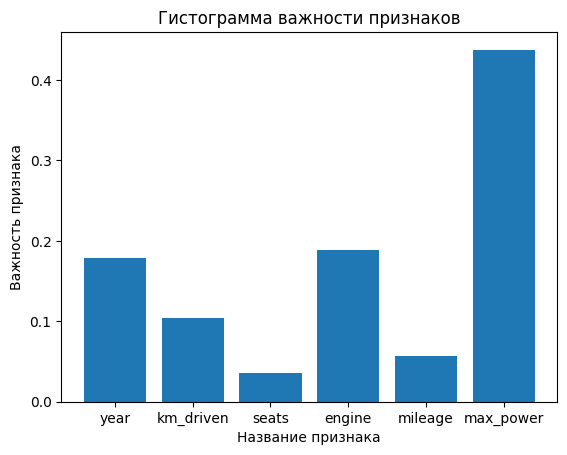

In [12]:
# Ваш код здесь
import matplotlib.pyplot as plt

plt.bar( range(len(model.feature_importances_)), model.feature_importances_)
plt.xticks(range(len(Xtrain.columns)), Xtrain.columns)
plt.title('Гистограмма важности признаков')
plt.xlabel('Название признака')
plt.ylabel('Важность признака')
plt.show()